<a href="https://colab.research.google.com/github/mohsinziabutt/Android-Flash-Light/blob/master/Customer_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Learning using 'K-Mode Clustering'**

**Accessing Fresh Data**

In [ ]:
bank = pd.read_csv("https://raw.githubusercontent.com/mohsinziabutt/MachineLearningAssignment/main/churn.csv")

bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Checking No, of Columns**

In [ ]:
bank.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**Total No. of Rows & Columns**

In [ ]:
bank.shape

(10000, 14)

**Importing Categorical Columns**

In [ ]:
bank_cust = bank[['Geography', 'Gender', 'Tenure', 'HasCrCard', 'IsActiveMember']]

**Displaying Dataset**

In [ ]:
bank_cust.head()

,Geography,Gender,Tenure,HasCrCard,IsActiveMember
0,France,Female,2,1,1
1,Spain,Female,1,0,1
2,France,Female,8,1,0
3,France,Female,1,0,0
4,Spain,Female,2,1,1


In [ ]:
bank_cust.describe()

,Tenure,HasCrCard,IsActiveMember
count,10000.000000,10000.00000,10000.000000
mean,5.012800,0.70550,0.515100
std,2.892174,0.45584,0.499797
min,0.000000,0.00000,0.000000
25%,3.000000,0.00000,0.000000
50%,5.000000,1.00000,1.000000
75%,7.000000,1.00000,1.000000
max,10.000000,1.00000,1.000000


In [ ]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Geography       10000 non-null  object
 1   Gender          10000 non-null  object
 2   Tenure          10000 non-null  int64 
 3   HasCrCard       10000 non-null  int64 
 4   IsActiveMember  10000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 390.8+ KB


**Checking if Data is cleaned**

In [ ]:
# Checking Null values
bank_cust.isnull().sum()*100/bank_cust.shape[0]

Geography         0.0
Gender            0.0
Tenure            0.0
HasCrCard         0.0
IsActiveMember    0.0
dtype: float64

**Data is already cleaned**

In [ ]:
print("There are no NULL values in the dataset, hence it is clean.")

There are no NULL values in the dataset, hence it is clean.


# **Model Building**

**Backing-Up The Dataset**

In [ ]:
# First we will keep a copy of data
bank_cust_copy = bank_cust.copy()

**Data Preparation (Labeling)**

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,Geography,Gender,Tenure,HasCrCard,IsActiveMember
0,0,0,2,1,1
1,2,0,1,0,1
2,0,0,8,1,0
3,0,0,1,0,0
4,2,0,2,1,1


**Intsalling and Importing 'kmodes' Library**

In [ ]:
# Importing Libraries
!pip install kmodes
from kmodes.kmodes import KModes

# **Using K-Mode with "Cao" initialization**

In [ ]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 20921.0


In [ ]:
# Predicted Clusters
fitClusters_cao

array([0, 1, 1, ..., 0, 1, 1], dtype=uint16)

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [ ]:
# Mode of the clusters
clusterCentroidsDf

,Geography,Gender,Tenure,HasCrCard,IsActiveMember
0,0,1,2,1,1
1,1,0,1,1,0


# **Using K-Mode with "Huang" initialization**

In [ ]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)

Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 22433.0


In [ ]:
# Predicted clusters
fitClusters_huang

array([0, 1, 0, ..., 0, 1, 0], dtype=uint16)

# **Choosing K by comparing Cost against each K**

In [ ]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 26275.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 20921.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 18782.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 17597.0


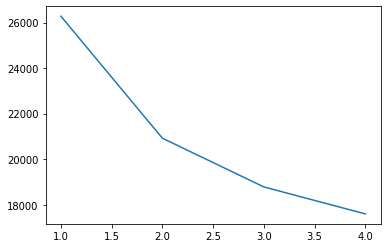

In [ ]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

**Choosing 'K=3'**

In [ ]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 18782.0


In [ ]:
fitClusters_cao

array([0, 1, 1, ..., 0, 1, 1], dtype=uint16)

**Combining the predicted clusters with the original DF**

In [ ]:
bank_cust = bank_cust_copy.reset_index()

In [ ]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [ ]:
combinedDf.head()

,Geography,Gender,Tenure,HasCrCard,IsActiveMember,cluster_predicted
0,France,Female,2,1,1,0
1,Spain,Female,1,0,1,1
2,France,Female,8,1,0,1
3,France,Female,1,0,0,1
4,Spain,Female,2,1,1,0


**Cluster Identification**

In [ ]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

In [ ]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5396 entries, 0 to 9997
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Geography          5396 non-null   object
 1   Gender             5396 non-null   object
 2   Tenure             5396 non-null   int64 
 3   HasCrCard          5396 non-null   int64 
 4   IsActiveMember     5396 non-null   int64 
 5   cluster_predicted  5396 non-null   uint16
dtypes: int64(3), object(2), uint16(1)
memory usage: 263.5+ KB


In [ ]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3008 entries, 1 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Geography          3008 non-null   object
 1   Gender             3008 non-null   object
 2   Tenure             3008 non-null   int64 
 3   HasCrCard          3008 non-null   int64 
 4   IsActiveMember     3008 non-null   int64 
 5   cluster_predicted  3008 non-null   uint16
dtypes: int64(3), object(2), uint16(1)
memory usage: 146.9+ KB


In [ ]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 5 to 9983
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Geography          1596 non-null   object
 1   Gender             1596 non-null   object
 2   Tenure             1596 non-null   int64 
 3   HasCrCard          1596 non-null   int64 
 4   IsActiveMember     1596 non-null   int64 
 5   cluster_predicted  1596 non-null   uint16
dtypes: int64(3), object(2), uint16(1)
memory usage: 77.9+ KB


# **Comparison**

**Geography**

*These bars are representing the the number of people having similar properties in Specific region. For Example:*

1.   *More than 3500 no. of people in France belong to Category A, upto 1000 people belong to Category B and upto 500 belong to Category C.*
2.   *Upto 800 no. of people belong to Category A, upto 1500 people belong to Category B and from 100 to 200 belong to Category C in Germany.*
3.   *Similarly, upto 1000 no. of people belong to Category A, upto 600 people belong to Category B and 1100 to 1200 belong to Category C in Spain.*



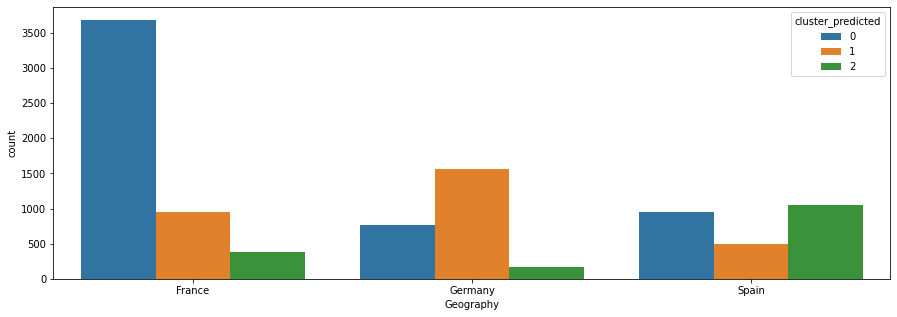

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Geography'],order=combinedDf['Geography'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

**Gender**

*These bars are representing the the number of males and females having similar properties in Specific region. For Example:*

1.   *Upto 4000 males belong to Category A, 400 to 500 belong to Category B and upto 1500 belong to Category C.*
2.   *Similarly, upto 2000 females belong to Category A, upto 3000 belong to Category B and 300 belong to Category C.*

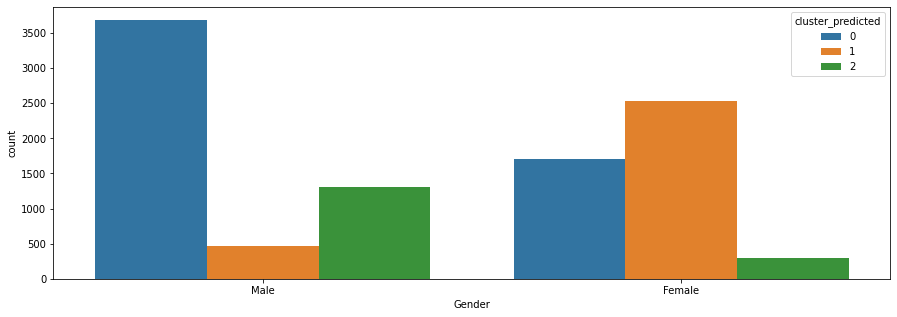

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Gender'],order=combinedDf['Gender'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

**Tenure**

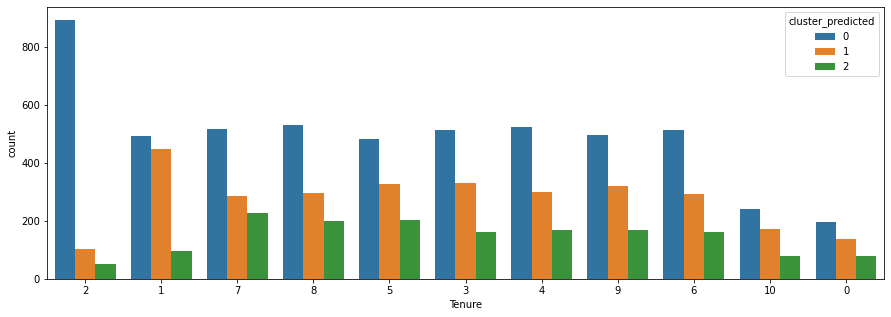

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Tenure'],order=combinedDf['Tenure'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

**HasCrCard**

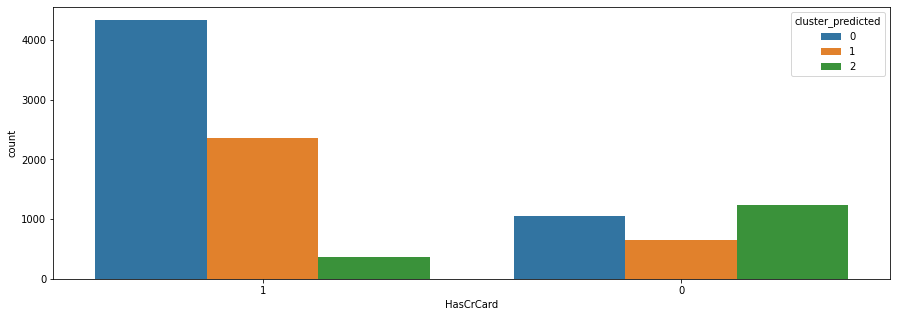

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['HasCrCard'],order=combinedDf['HasCrCard'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

**IsActiveMember**

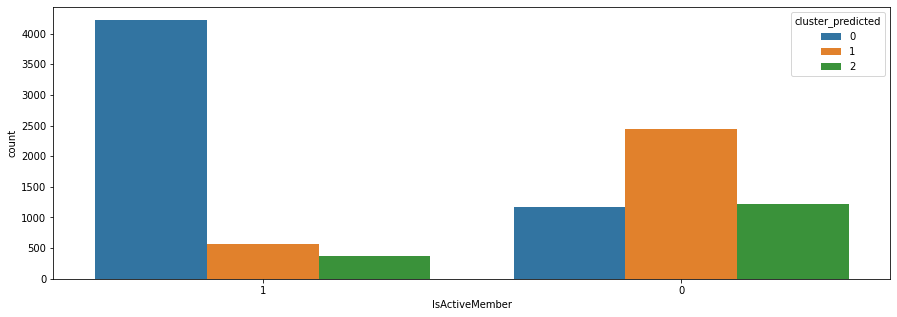

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['IsActiveMember'],order=combinedDf['IsActiveMember'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

**Final Graph For All Features**

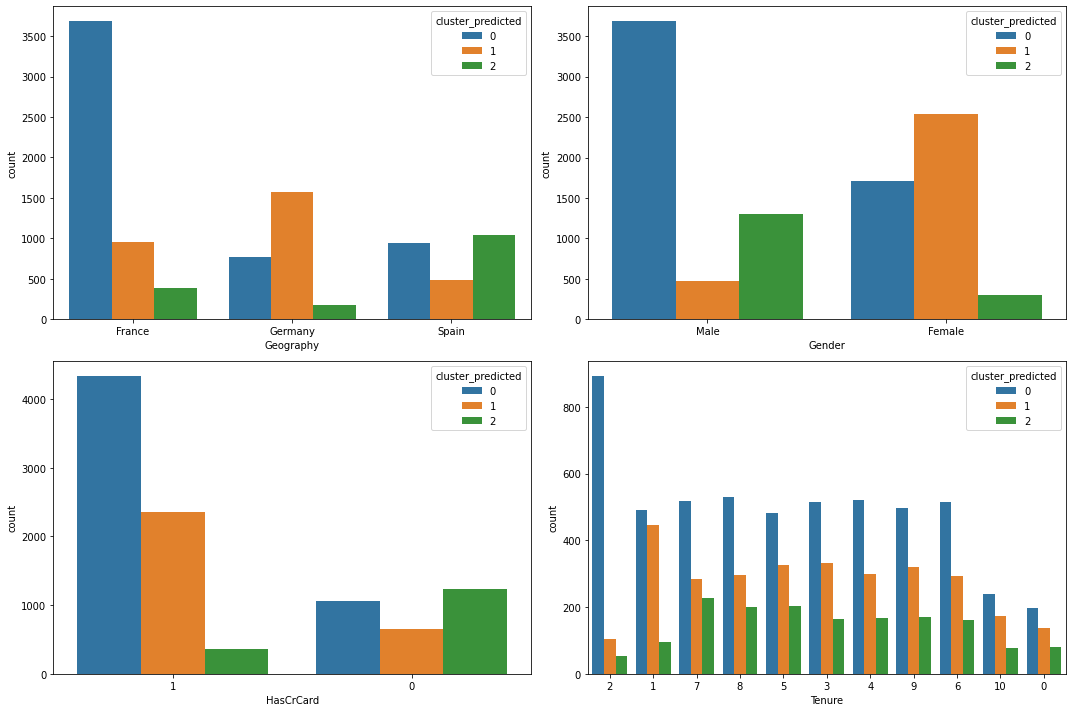

In [ ]:
f, axs = plt.subplots(2,2,figsize = (15,10))
sns.countplot(x=combinedDf['Geography'],order=combinedDf['Geography'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0,0])
sns.countplot(x=combinedDf['Gender'],order=combinedDf['Gender'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0,1])
sns.countplot(x=combinedDf['HasCrCard'],order=combinedDf['HasCrCard'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1,0])
sns.countplot(x=combinedDf['Tenure'],order=combinedDf['Tenure'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1,1])

plt.tight_layout()
plt.show()